In [2]:
import requests
import pandas as pd
import json

earthquake_url = 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson'
r = requests.get(earthquake_url)

In [28]:
r.json().keys()

dict_keys(['features', 'type', 'bbox', 'metadata'])

In [29]:
r.json()['metadata']

{'api': '1.1.1',
 'count': 8177,
 'generated': 1454327426000,
 'status': 200,
 'title': 'USGS All Earthquakes, Past Month',
 'url': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson'}

In [30]:
r.json()['type']

'FeatureCollection'

In [31]:
r.json()['bbox']

[-179.7443, -64.6204, -3.48, 179.8983, 84.3324, 633.39]

In [32]:
from pandas.io.json import json_normalize

earthquakes_df = json_normalize(r.json()['features'])
earthquakes_df.columns

Index(['geometry.coordinates', 'geometry.type', 'id', 'properties.alert',
       'properties.cdi', 'properties.code', 'properties.detail',
       'properties.dmin', 'properties.felt', 'properties.gap',
       'properties.ids', 'properties.mag', 'properties.magType',
       'properties.mmi', 'properties.net', 'properties.nst',
       'properties.place', 'properties.rms', 'properties.sig',
       'properties.sources', 'properties.status', 'properties.time',
       'properties.title', 'properties.tsunami', 'properties.type',
       'properties.types', 'properties.tz', 'properties.updated',
       'properties.url', 'type'],
      dtype='object')

In [33]:
earthquakes_df.head()

,geometry.coordinates,geometry.type,id,properties.alert,properties.cdi,properties.code,properties.detail,properties.dmin,properties.felt,properties.gap,...,properties.status,properties.time,properties.title,properties.tsunami,properties.type,properties.types,properties.tz,properties.updated,properties.url,type
0,"[-116.9315, 33.7851667, 10.17]",Point,ci37301703,None,NaN,37301703,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.037910,NaN,34,...,automatic,1454325488440,"M 1.2 - 2km E of San Jacinto, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454325737630,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
1,"[-147.7573, 60.4186, 17.2]",Point,ak12613497,None,NaN,12613497,http://earthquake.usgs.gov/earthquakes/feed/v1...,NaN,NaN,NaN,...,automatic,1454325406000,"M 2.0 - 64km SE of Whittier, Alaska",0,earthquake,",general-link,geoserve,nearby-cities,origin,te...",-540,1454325977971,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
2,"[-122.8134995, 38.8218346, 2.4]",Point,nc72587091,None,NaN,72587091,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.003096,NaN,146,...,automatic,1454323288480,"M 0.2 - 7km W of Cobb, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454324645786,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
3,"[-121.7949982, 37.4766655, 8.21]",Point,nc72587086,None,NaN,72587086,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.041560,NaN,128,...,automatic,1454322983430,"M 1.8 - 10km N of East Foothills, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454326805831,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
4,"[-116.9861667, 33.9913333, 15.85]",Point,ci37301695,None,NaN,37301695,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.069920,NaN,51,...,automatic,1454322234700,"M 1.3 - 6km E of Calimesa, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454322489937,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature


In [34]:
earthquakes_df.to_csv('earthquakes_data_Feb_2016.csv', index=False)

In [3]:
earthquakes_df = pd.read_csv('earthquakes_data_Feb_2016.csv')
earthquakes_df.head()

,geometry.coordinates,geometry.type,id,properties.alert,properties.cdi,properties.code,properties.detail,properties.dmin,properties.felt,properties.gap,...,properties.status,properties.time,properties.title,properties.tsunami,properties.type,properties.types,properties.tz,properties.updated,properties.url,type
0,"[-116.9315, 33.7851667, 10.17]",Point,ci37301703,NaN,NaN,37301703,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.037910,NaN,34,...,automatic,1454325488440,"M 1.2 - 2km E of San Jacinto, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454325737630,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
1,"[-147.7573, 60.4186, 17.2]",Point,ak12613497,NaN,NaN,12613497,http://earthquake.usgs.gov/earthquakes/feed/v1...,NaN,NaN,NaN,...,automatic,1454325406000,"M 2.0 - 64km SE of Whittier, Alaska",0,earthquake,",general-link,geoserve,nearby-cities,origin,te...",-540,1454325977971,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
2,"[-122.8134995, 38.8218346, 2.4]",Point,nc72587091,NaN,NaN,72587091,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.003096,NaN,146,...,automatic,1454323288480,"M 0.2 - 7km W of Cobb, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454324645786,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
3,"[-121.7949982, 37.4766655, 8.21]",Point,nc72587086,NaN,NaN,72587086,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.041560,NaN,128,...,automatic,1454322983430,"M 1.8 - 10km N of East Foothills, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454326805831,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature
4,"[-116.9861667, 33.9913333, 15.85]",Point,ci37301695,NaN,NaN,37301695,http://earthquake.usgs.gov/earthquakes/feed/v1...,0.069920,NaN,51,...,automatic,1454322234700,"M 1.3 - 6km E of Calimesa, California",0,earthquake,",general-link,geoserve,nearby-cities,origin,ph...",-480,1454322489937,http://earthquake.usgs.gov/earthquakes/eventpa...,Feature


# Data Exploration and Visualization

In [6]:
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
earthquakes_df.describe()

,properties.cdi,properties.dmin,properties.felt,properties.gap,properties.mag,properties.mmi,properties.nst,properties.rms,properties.sig,properties.time,properties.tsunami,properties.tz,properties.updated
count,1627.000000,5517.000000,1627.000000,5983.000000,8177.000000,89.000000,5184.000000,8169.000000,8177.000000,8.177000e+03,8177.000000,8177.000000,8.177000e+03
mean,1.655378,0.498420,12.696988,126.442650,1.657777,3.923034,16.932292,0.306382,63.634340,1.452966e+12,0.004280,-444.836126,1.453214e+12
std,1.108094,2.119403,213.843636,72.826475,1.155796,1.496997,14.021064,0.291188,93.374955,7.117056e+08,0.065288,216.859332,7.144446e+08
min,0.000000,0.000267,0.000000,12.000000,-1.300000,0.000000,0.000000,0.000000,0.000000,1.451736e+12,0.000000,-720.000000,1.451737e+12
25%,1.000000,0.020840,0.000000,72.000000,0.880000,3.260000,7.000000,0.090000,12.000000,1.452363e+12,0.000000,-540.000000,1.452640e+12
50%,1.000000,0.080790,0.000000,107.000000,1.400000,3.840000,12.000000,0.180000,30.000000,1.452946e+12,0.000000,-480.000000,1.453266e+12
75%,2.200000,0.208000,1.000000,161.285000,2.100000,4.710000,22.000000,0.490000,68.000000,1.453629e+12,0.000000,-480.000000,1.453862e+12
max,7.800000,49.212000,7821.000000,356.400000,7.200000,7.120000,136.000000,2.170000,1756.000000,1.454325e+12,1.000000,780.000000,1.454327e+12


In [9]:
earthquakes_df['properties.alert'].value_counts()

green     49
yellow     1
orange     1
Name: properties.alert, dtype: int64

In [10]:
earthquakes_df['properties.type'].value_counts()

earthquake           8064
quarry blast           77
explosion              32
not reported            1
sonic boom              1
rock burst              1
nuclear explosion       1
Name: properties.type, dtype: int64

In [26]:
alert_value_count_series = earthquakes_df['properties.alert'].value_counts()
alert_value_count_df = pd.DataFrame(alert_value_count_series)
alert_value_count_df.columns = ['Alert Type']
alert_value_count_df

,Alert Type
green,49
yellow,1
orange,1


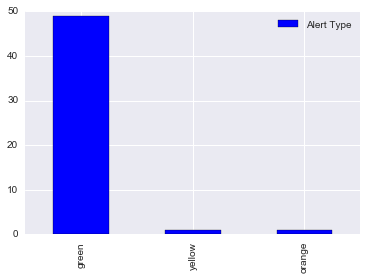

In [27]:
fig = alert_value_count_df.plot(kind='bar')

In [28]:
def plot_value_count_as_bar(column, variable_name):
    column_value_count_series = column.value_counts()
    column_value_count_df = pd.DataFrame(column_value_count_series)
    column_value_count_df.columns = [variable_name]
    fig = column_value_count_df.plot(kind='bar')

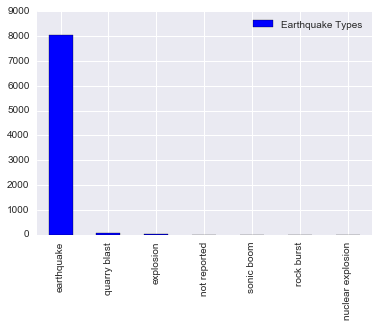

In [30]:
plot_value_count_as_bar(earthquakes_df['properties.type'], 'Earthquake Types')

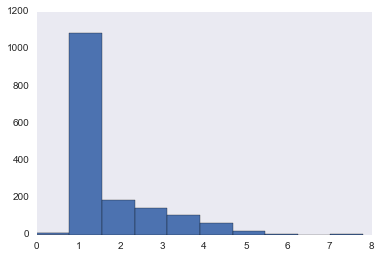

In [31]:
earthquakes_df['properties.cdi'].hist(grid=False)

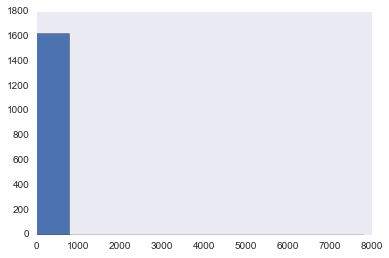

In [32]:
earthquakes_df['properties.felt'].hist(grid=False)

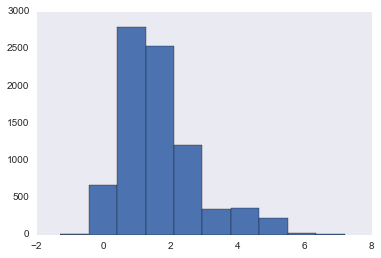

In [33]:
earthquakes_df['properties.mag'].hist(grid=False)

In [37]:
earthquakes_df.ix[earthquakes_df['properties.mag'].idxmax(),]

geometry.coordinates                           [158.5064, 54.007, 160.97]
geometry.type                                                       Point
id                                                             us20004vvx
properties.alert                                                   yellow
properties.cdi                                                        3.4
properties.code                                                  20004vvx
properties.detail       http://earthquake.usgs.gov/earthquakes/feed/v1...
properties.dmin                                                     0.989
properties.felt                                                         2
properties.gap                                                         18
properties.ids                         ,pt16030050,at00o1qxho,us20004vvx,
properties.mag                                                        7.2
properties.magType                                                    mww
properties.mmi                        